In [8]:
import pandas as pd
import numpy as np

# Chart atau Grafik
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix 
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

# Model Select
from sklearn.model_selection import train_test_split

# Scaling Data
from sklearn import preprocessing

# Import library untuk modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Untuk perhitungan
import math

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('penguin_size.csv')

In [10]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df.select_dtypes(exclude='object').corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [13]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [16]:
df.isna().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
df.drop(['island'], inplace=True, axis=1)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_col = ['species', 'sex']
df[label_col] = df[label_col].apply(le.fit_transform)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,2
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
3,0,41.1,17.0,190.0,3800.0,2
4,0,36.7,19.3,193.0,3450.0,1


In [21]:
X = df.drop('species', axis=1)
y = df['species']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Membuat model RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Random Forest
#Predict the values for test data
rf_pred = model.predict(X_test)
#Default score for Classification model is accuracy. So, it will show the accuracy.
print("Akurasi dari algoritma Random Forest adalah ", model.score(X_test, y_test))

Akurasi dari algoritma Random Forest adalah  0.9711538461538461


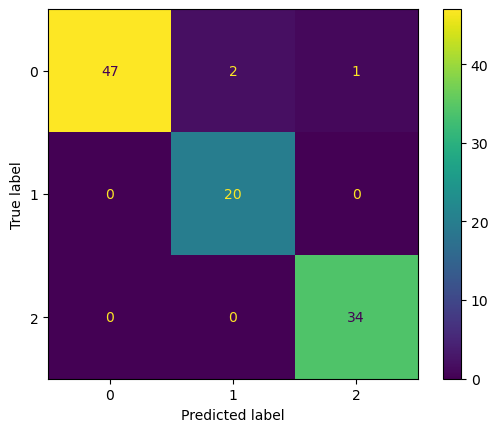

In [24]:
# We will plot the confusion Matrix for better view of our results.
CM_RF = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(CM_RF).plot()

In [25]:
import joblib

# Simpan model
joblib.dump(model, 'penguins_model.pkl')

['penguin_model.pkl']